In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("karkavelrajaj/amazon-sales-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.95M/1.95M [00:00<00:00, 66.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/karkavelrajaj/amazon-sales-dataset/versions/1


# 新段落

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [ ]:
import os

# Replace 'path' with the directory variable if needed
files = os.listdir(path)
print(files)

df = pd.read_csv(os.path.join(path, 'amazon.csv'))
print(df.head(5))

['amazon.csv']
   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349       

In [ ]:
#df = df.drop(columns=['img_link', 'product_link'])
#df_category = pd.get_dummies(df, columns=['category'])
#df_category.head()
df_selected = df[['product_id', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']]

In [ ]:
print((df_selected == 0).sum())

product_id             0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
dtype: int64


In [ ]:
print(df_selected.isnull().sum())

product_id             0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
dtype: int64


In [ ]:
# Convert the column to numeric, forcing errors to NaN (if there are non-numeric values)
df_selected['rating_count'] = pd.to_numeric(df_selected['rating_count'], errors='coerce')

# Fill NaN values with the mean of the column
df_selected['rating_count'].fillna(df_selected['rating_count'].mean(), inplace=True)

<ipython-input-7-5d2b043b063c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['rating_count'] = pd.to_numeric(df_selected['rating_count'], errors='coerce')
<ipython-input-7-5d2b043b063c>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_selected['rating_count'].fillna(df_

In [ ]:
print(df_selected.isnull().sum())

product_id             0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
dtype: int64


In [ ]:
df_selected.head(5)

product_id                                           category  \
0  B07JW9H4J1  Computers&Accessories|Accessories&Peripherals|...   
1  B098NS6PVG  Computers&Accessories|Accessories&Peripherals|...   
2  B096MSW6CT  Computers&Accessories|Accessories&Peripherals|...   
3  B08HDJ86NZ  Computers&Accessories|Accessories&Peripherals|...   
4  B08CF3B7N1  Computers&Accessories|Accessories&Peripherals|...   

  discounted_price actual_price discount_percentage rating  rating_count  
0             ₹399       ₹1,099                 64%    4.2    348.217791  
1             ₹199         ₹349                 43%    4.0    348.217791  
2             ₹199       ₹1,899                 90%    3.9    348.217791  
3             ₹329         ₹699                 53%    4.2    348.217791  
4             ₹154         ₹399                 61%    4.2    348.217791

In [ ]:
print(df_selected.dtypes)

product_id              object
category                object
discounted_price        object
actual_price            object
discount_percentage     object
rating                  object
rating_count           float64
dtype: object


In [ ]:
# prompt: let discounted_price and actual_price did not show the symbol$ only show the number, and let rating to be numeric. do not drop na, use mean to instead， also change discount_percentage from percentage to numeric like '10% to 0.1' and change to float

# ... (Your existing code)

# Clean 'discounted_price' and 'actual_price'
df_selected['discounted_price'] = df_selected['discounted_price'].astype(str).str.replace(r'[₹,]', '', regex=True).astype(float)
df_selected['actual_price'] = df_selected['actual_price'].astype(str).str.replace(r'[₹,]', '', regex=True).astype(float)

# Clean 'rating'
df_selected['rating'] = pd.to_numeric(df_selected['rating'], errors='coerce')

# Clean 'discount_percentage'
df_selected['discount_percentage'] = df_selected['discount_percentage'].astype(str).str.replace('%', '', regex=False).astype(float) / 100

print(df_selected.dtypes)
print(df_selected.head(5))

product_id              object
category                object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count           float64
dtype: object
   product_id                                           category  \
0  B07JW9H4J1  Computers&Accessories|Accessories&Peripherals|...   
1  B098NS6PVG  Computers&Accessories|Accessories&Peripherals|...   
2  B096MSW6CT  Computers&Accessories|Accessories&Peripherals|...   
3  B08HDJ86NZ  Computers&Accessories|Accessories&Peripherals|...   
4  B08CF3B7N1  Computers&Accessories|Accessories&Peripherals|...   

   discounted_price  actual_price  discount_percentage  rating  rating_count  
0             399.0        1099.0                 0.64     4.2    348.217791  
1             199.0         349.0                 0.43     4.0    348.217791  
2             199.0        1899.0                 0.90     3.9    348.217791  
3             329.0         699.0           

<ipython-input-11-56a689181726>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['discounted_price'] = df_selected['discounted_price'].astype(str).str.replace(r'[₹,]', '', regex=True).astype(float)
<ipython-input-11-56a689181726>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['actual_price'] = df_selected['actual_price'].astype(str).str.replace(r'[₹,]', '', regex=True).astype(float)
<ipython-input-11-56a689181726>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy o

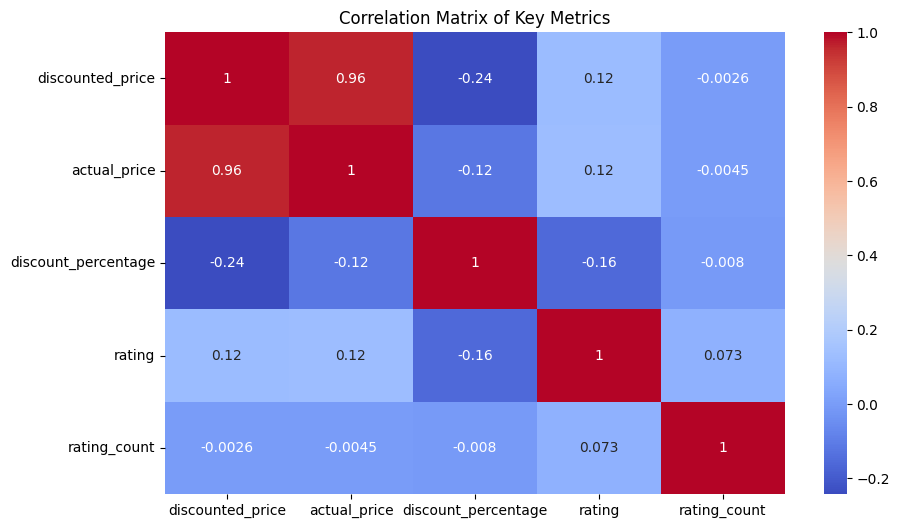

'\n# Boxplot to show the distribution of ratings across categories\nplt.figure(figsize=(12, 6))\nsns.boxplot(x=\'category\', y=\'rating\', data=df_selected, palette="Set3")\nplt.title(\'Distribution of Ratings across Categories\')\nplt.xticks(rotation=45, ha=\'right\')\nplt.show()\n\n# Jointplot to see the relationship between actual price and discounted price\nsns.jointplot(data=df_selected, x="actual_price", y="discounted_price", kind="kde", color="#ce1414")\nplt.show()'

In [ ]:


# Now, proceed with the visualization
'''plt.figure(figsize=(10, 6))
sns.scatterplot(x='discounted_price', y='rating', data=df_selected, hue='category', palette='viridis', s=100)
plt.xlabel('Discounted Price')
plt.ylabel('Rating')
plt.title('Relationship between Discounted Price and Rating')
plt.show()

'''
plt.figure(figsize=(10, 6))
sns.heatmap(df_selected[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Key Metrics')
plt.show()
'''
# Boxplot to show the distribution of ratings across categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='rating', data=df_selected, palette="Set3")
plt.title('Distribution of Ratings across Categories')
plt.xticks(rotation=45, ha='right')
plt.show()

# Jointplot to see the relationship between actual price and discounted price
sns.jointplot(data=df_selected, x="actual_price", y="discounted_price", kind="kde", color="#ce1414")
plt.show()'''

In [ ]:
# prompt: seperate each category name with '|' and group them by rating

# Group categories by rating and join with '|'
category_by_rating = df_selected.groupby('rating')['category'].apply(lambda x: '|'.join(x.astype(str))).reset_index()
category_by_rating

rating                                           category
0      2.0  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...
1      2.3  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...
2      2.6  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...
3      2.8  Electronics|WearableTechnology|SmartWatches|Ho...
4      2.9  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...
5      3.0  Electronics|HomeTheater,TV&Video|Accessories|R...
6      3.1  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...
7      3.2  Electronics|HomeTheater,TV&Video|Accessories|R...
8      3.3  Computers&Accessories|Accessories&Peripherals|...
9      3.4  Electronics|HomeTheater,TV&Video|Televisions|S...
10     3.5  Computers&Accessories|Accessories&Peripherals|...
11     3.6  Electronics|HomeTheater,TV&Video|Accessories|R...
12     3.7  Electronics|HomeTheater,TV&Video|Accessories|C...
13     3.8  Electronics|HomeTheater,TV&Video|Accessories|R...
14     3.9  Computers&Accessories|Accessories&Peripherals|...
15     4.0  Computers&Accessories|Accessories&Peripherals|...
16     4.1  Computers&Accessories|Accessories&Peripherals|...
17     4.2  Computers&Accessories|Accessories&Peripherals|...
18     4.3  Computers&Accessories|Accessories&Peripherals|...
19     4.4  Electronics|HomeTheater,TV&Video|Accessories|C...
20     4.5  Computers&Accessories|Accessories&Peripherals|...
21     4.6  Electronics|HomeTheater,TV&Video|Accessories|C...
22     4.7  Electronics|HomeTheater,TV&Video|Televisions|S...
23     4.8  Home&Kitchen|Heating,Cooling&AirQuality|WaterH...
24     5.0  Computers&Accessories|Accessories&Peripherals|...

In [ ]:
# prompt: seperate category with '|', like 'Home&Kitchen|Heating,Cooling&AirQuality' will be 'Home&Kitchen' as a new column same as dummies and 'Heating,Cooling&AirQuality'  as a new column, then groupby each category, please sepereate all '|', there are a lot. Let it to be a new dataset

import pandas as pd

# Assuming df_selected is your DataFrame as defined in the previous code

def split_categories(df, column_name='category'):
    """
    Splits categories separated by '|' into individual columns.

    Args:
      df: DataFrame containing the category column.
      column_name: Name of the column containing categories. Defaults to 'category'.

    Returns:
      A new DataFrame with separated categories.
    """

    new_df = df.copy()  # Create a copy to avoid modifying the original
    categories_list = []
    for index, row in df.iterrows():
      categories = row[column_name].split("|")
      categories_list.append(categories)
    # Create new columns for the split categories
    for i in range(len(max(categories_list, key=len))):
        new_df[f'category_{i+1}'] = [c[i] if i < len(c) else "" for c in categories_list]

    return new_df

# Apply the function to your DataFrame
new_df_categories = split_categories(df_selected)
print(new_df_categories.head())

# Group by individual category columns (if needed)

# Example grouping by 'category_1' and aggregating 'rating' with the mean
grouped_data = new_df_categories.groupby('category_1')['rating'].mean().reset_index()
print(grouped_data.head())

grouped_data = new_df_categories.groupby('category_1')['discount_percentage'].mean().reset_index()
print(grouped_data.head())

   product_id                                           category  \
0  B07JW9H4J1  Computers&Accessories|Accessories&Peripherals|...   
1  B098NS6PVG  Computers&Accessories|Accessories&Peripherals|...   
2  B096MSW6CT  Computers&Accessories|Accessories&Peripherals|...   
3  B08HDJ86NZ  Computers&Accessories|Accessories&Peripherals|...   
4  B08CF3B7N1  Computers&Accessories|Accessories&Peripherals|...   

   discounted_price  actual_price  discount_percentage  rating  rating_count  \
0             399.0        1099.0                 0.64     4.2    348.217791   
1             199.0         349.0                 0.43     4.0    348.217791   
2             199.0        1899.0                 0.90     3.9    348.217791   
3             329.0         699.0                 0.53     4.2    348.217791   
4             154.0         399.0                 0.61     4.2    348.217791   

              category_1               category_2          category_3  \
0  Computers&Accessories  Accessories

In [ ]:
# prompt: Group by individual category columns
# grouping by 'category_1', and aggregating 'rating' and 'discount precentage'  and 'actual price' with the mean then grouping by 'category_2', and aggregating 'rating' and 'discount precentage'  and 'actual price' with the mean and similar to 3, 4, 5

# Group by individual category columns and aggregate 'rating', 'discount_percentage', and 'actual_price' with the mean

for i in range(1, 6):  # Assuming you have up to 5 category columns
    category_column = f'category_{i}'
    if category_column in new_df_categories.columns:
        grouped_data = new_df_categories.groupby(category_column).agg(
            {'rating': 'mean', 'discount_percentage': 'mean', 'actual_price': 'mean'}
        ).reset_index()
        print(f"Grouped data by {category_column}:\n{grouped_data.head()}\n")
    else:
        print(f"Column {category_column} not found in the DataFrame.")

Grouped data by category_1:
              category_1    rating  discount_percentage  actual_price
0          Car&Motorbike  3.800000             0.420000   4000.000000
1  Computers&Accessories  4.154967             0.540243   1683.623135
2            Electronics  4.081749             0.508289  10127.311787
3    Health&PersonalCare  4.000000             0.530000   1900.000000
4           Home&Kitchen  4.040716             0.401205   4162.073661

Grouped data by category_2:
                category_2    rating  discount_percentage  actual_price
0              Accessories  4.335714             0.577857   2071.214286
1  Accessories&Peripherals  4.148556             0.559790   1119.832861
2              Arts&Crafts  4.300000             0.000000    150.000000
3      Cameras&Photography  4.125000             0.475625   2594.187500
4           CarAccessories  3.800000             0.420000   4000.000000

Grouped data by category_3:
               category_3    rating  discount_percentage  actu

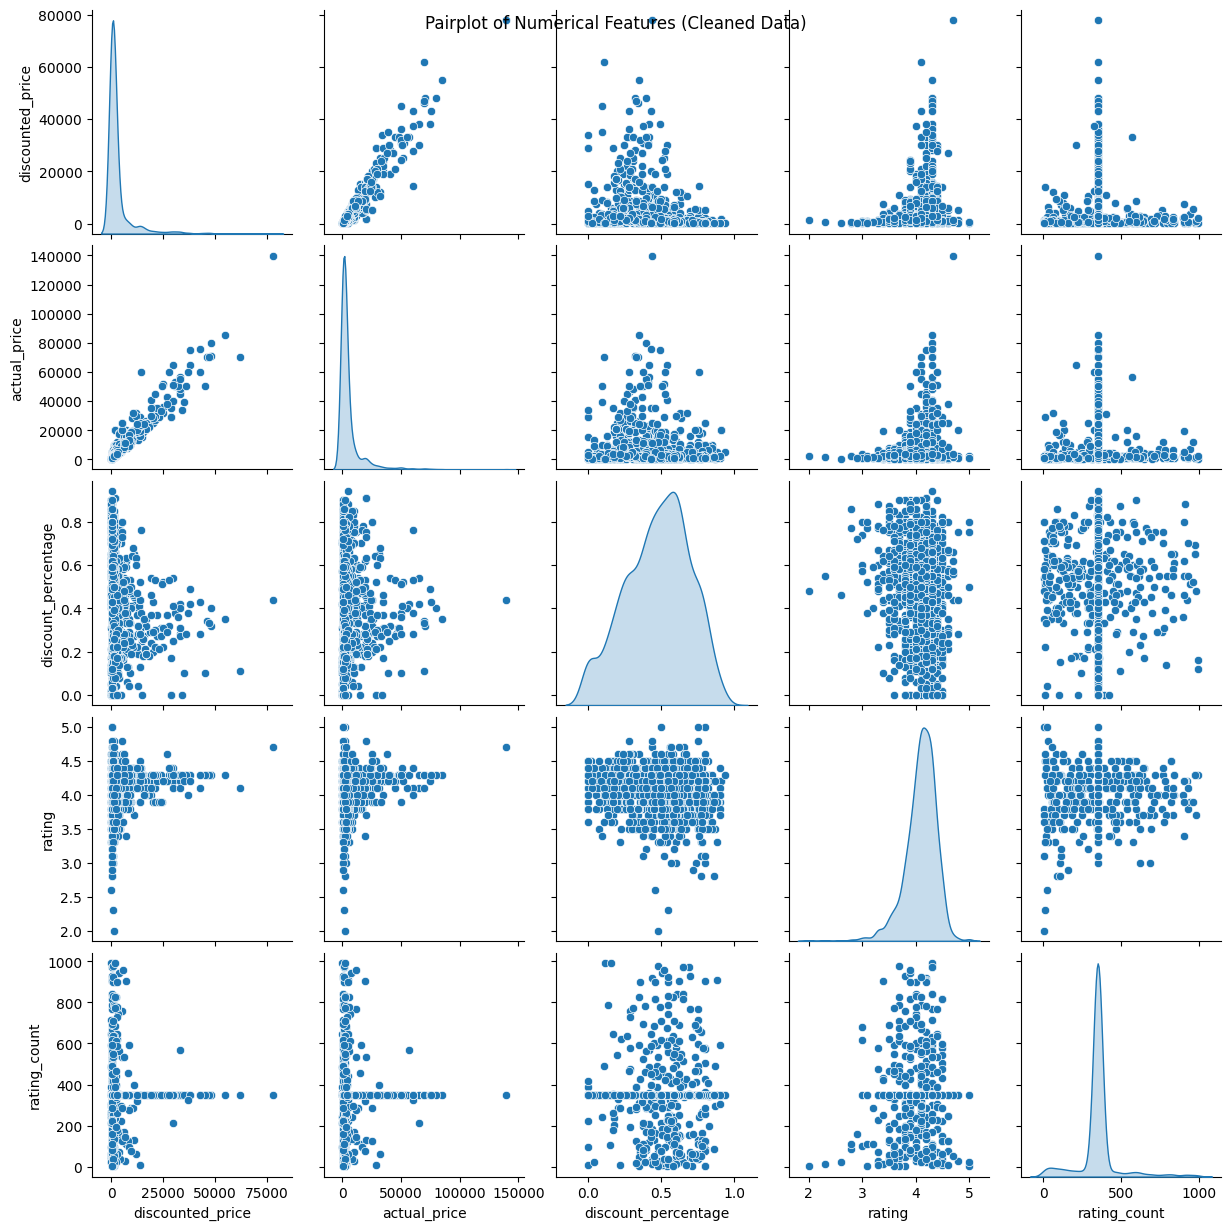

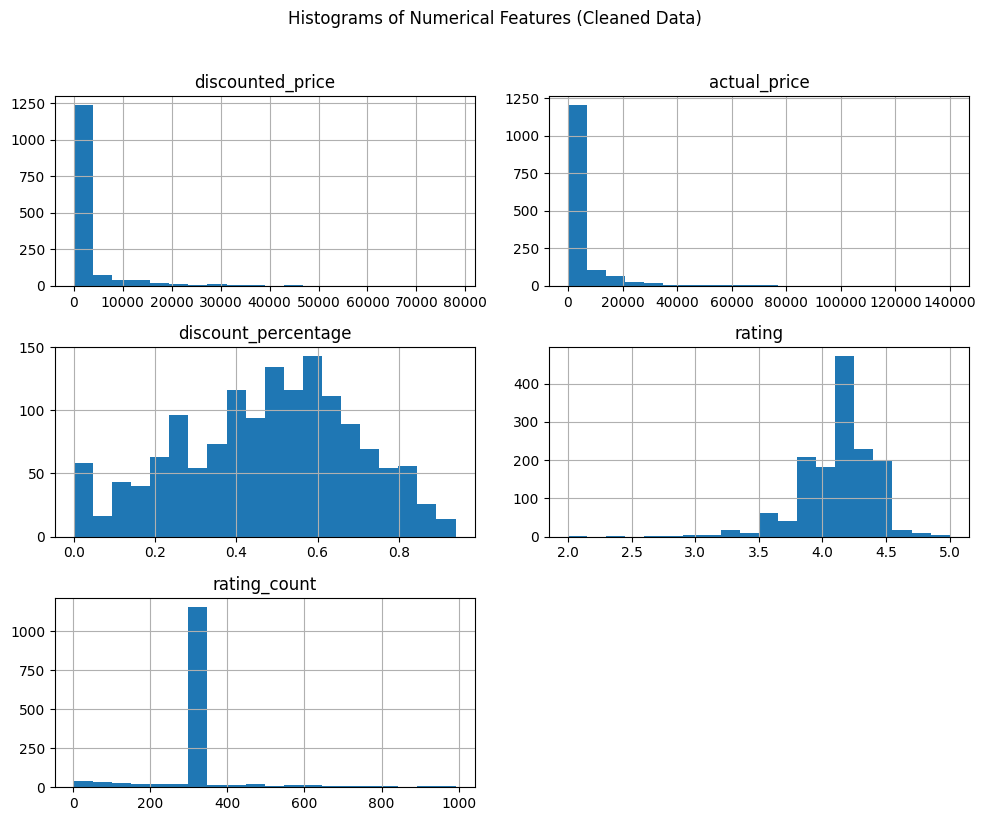

In [ ]:
# prompt: do some data visualization to help us understand dataset both before and after cleaning better and explain each image

import matplotlib.pyplot as plt
import seaborn as sns
# 4. Pairplot of key numerical features (after cleaning):
sns.pairplot(df_selected[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']], diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features (Cleaned Data)')
plt.show()
#Explanation: This provides a matrix of scatter plots for all pairwise combinations of the numerical features. The diagonal shows the KDE plots of each feature's distribution.  This helps identify potential correlations or patterns between different variables, and helps better visualize the impact of the cleaning process.


# 5.  Histograms for Key Features:
df_selected.hist(figsize=(10, 8), bins=20)
plt.suptitle('Histograms of Numerical Features (Cleaned Data)', y=1.02)
plt.tight_layout()
plt.show()

#Explanation: Histograms visualize the frequency distributions of each numerical column. Comparing these histograms with those generated before cleaning can highlight the improvements in data distribution, such as the removal of unrealistic values or outliers.

<ipython-input-14-ad26ee5bea23>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_column, y='rating', data=new_df_categories, palette="Set3")


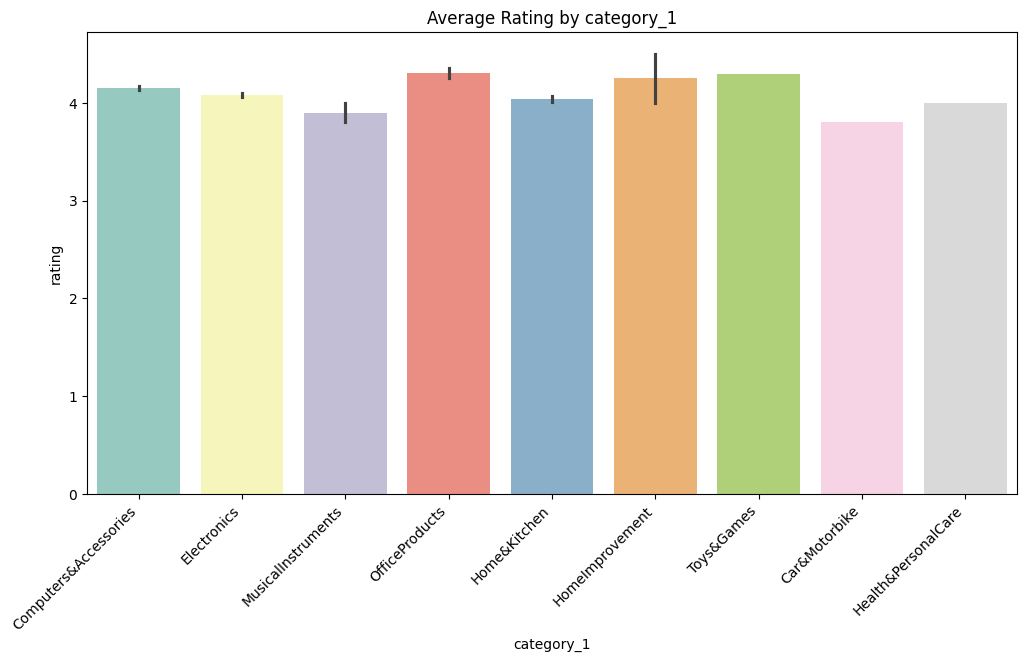

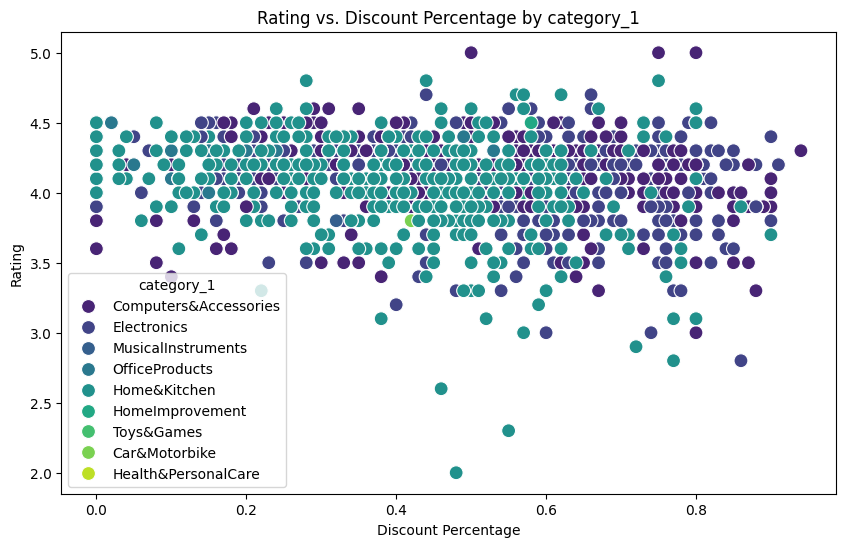

<ipython-input-14-ad26ee5bea23>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_column, y='rating', data=new_df_categories, palette="Set3")


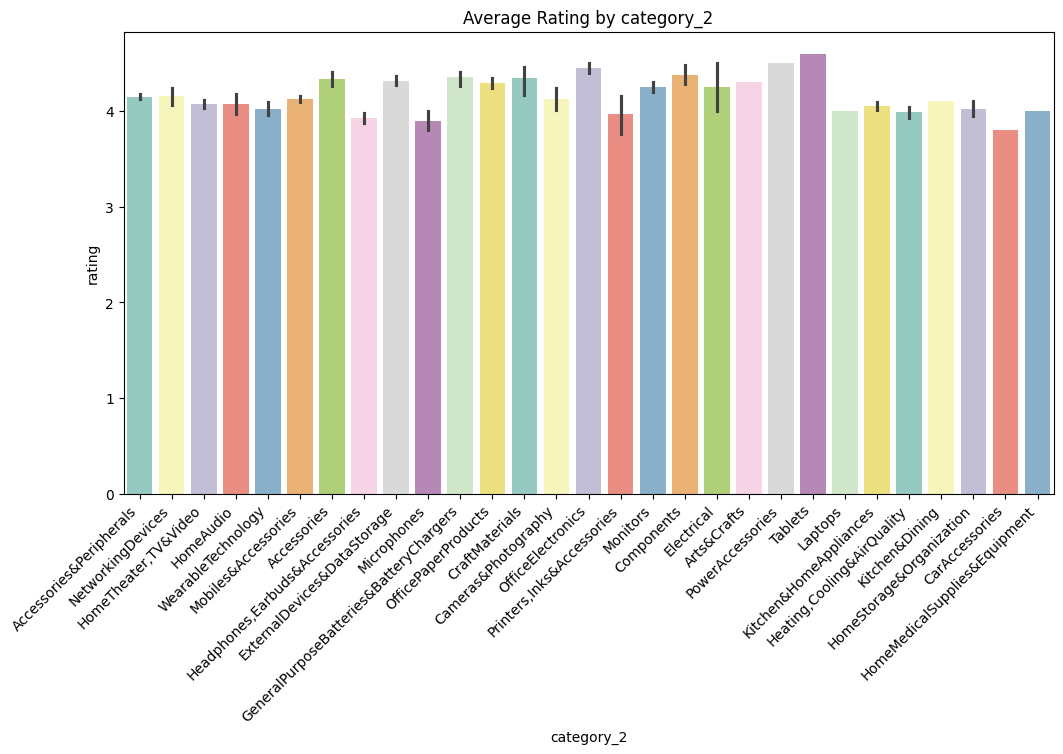

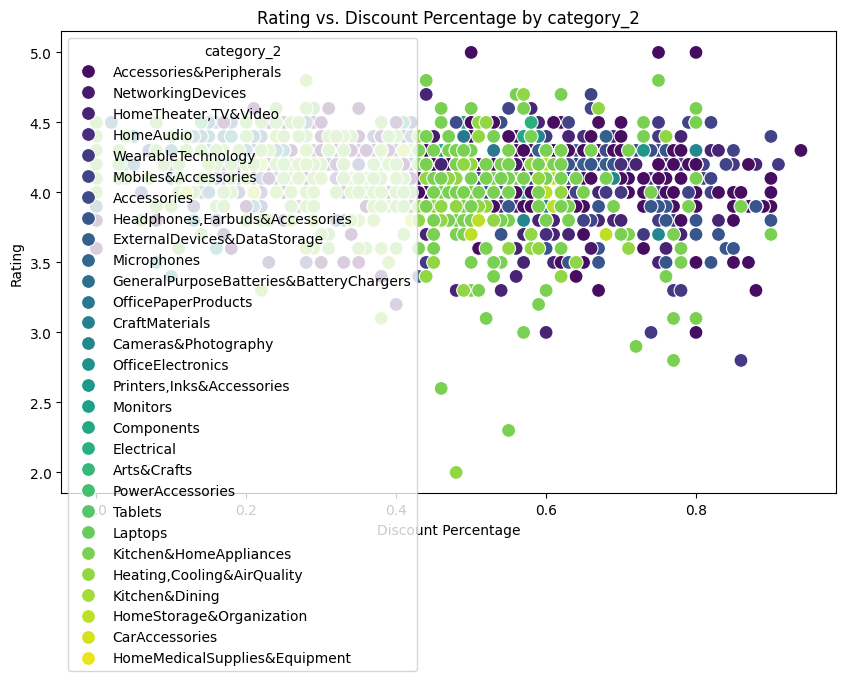

<ipython-input-14-ad26ee5bea23>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_column, y='rating', data=new_df_categories, palette="Set3")


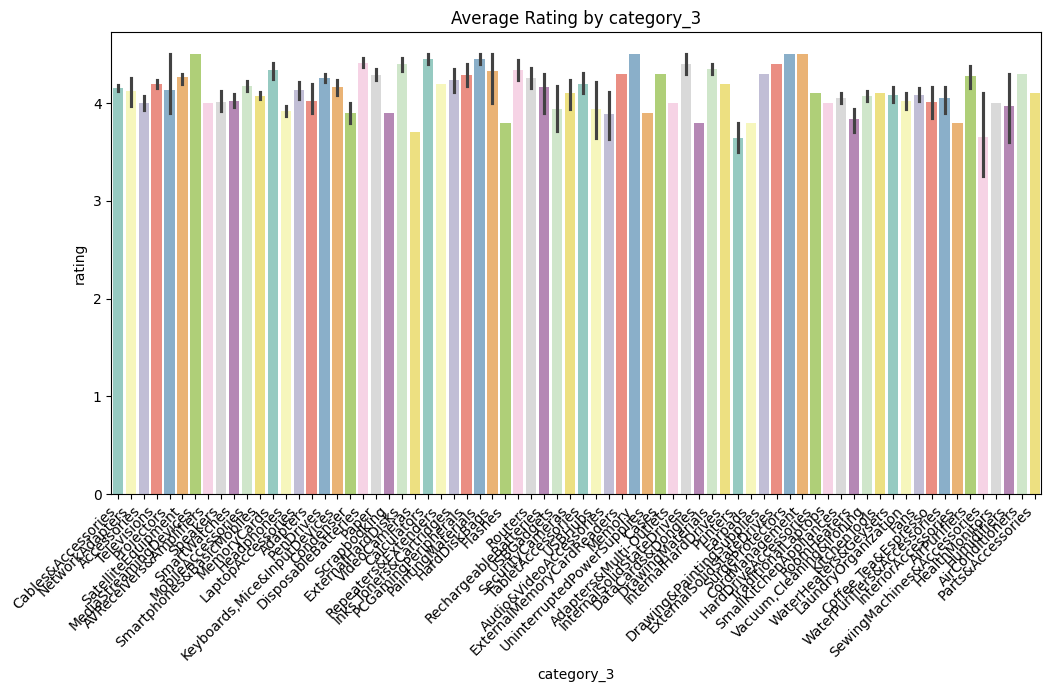

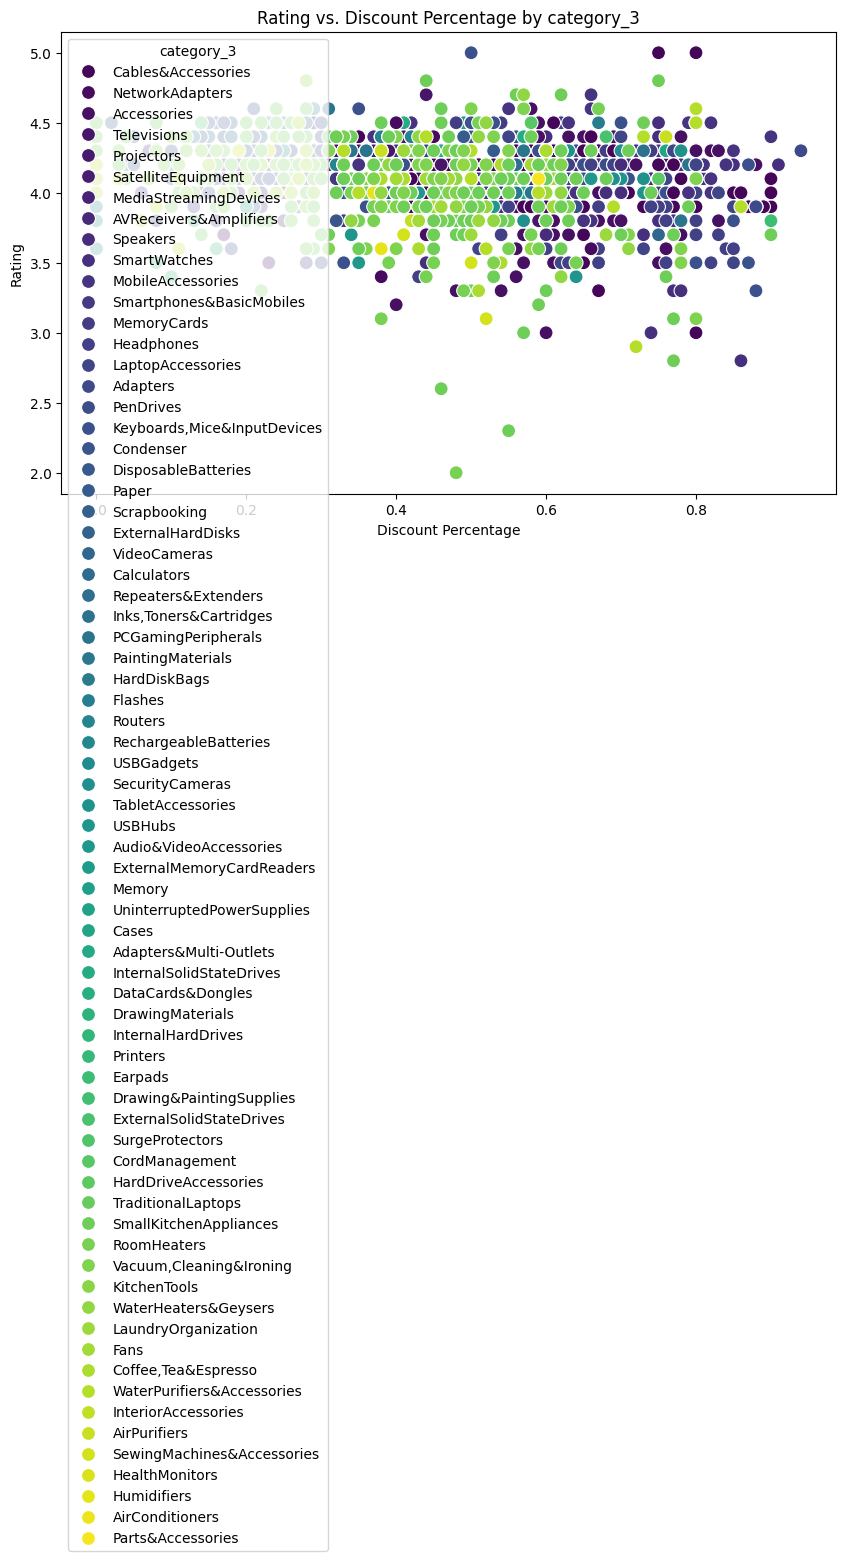

<ipython-input-14-ad26ee5bea23>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_column, y='rating', data=new_df_categories, palette="Set3")


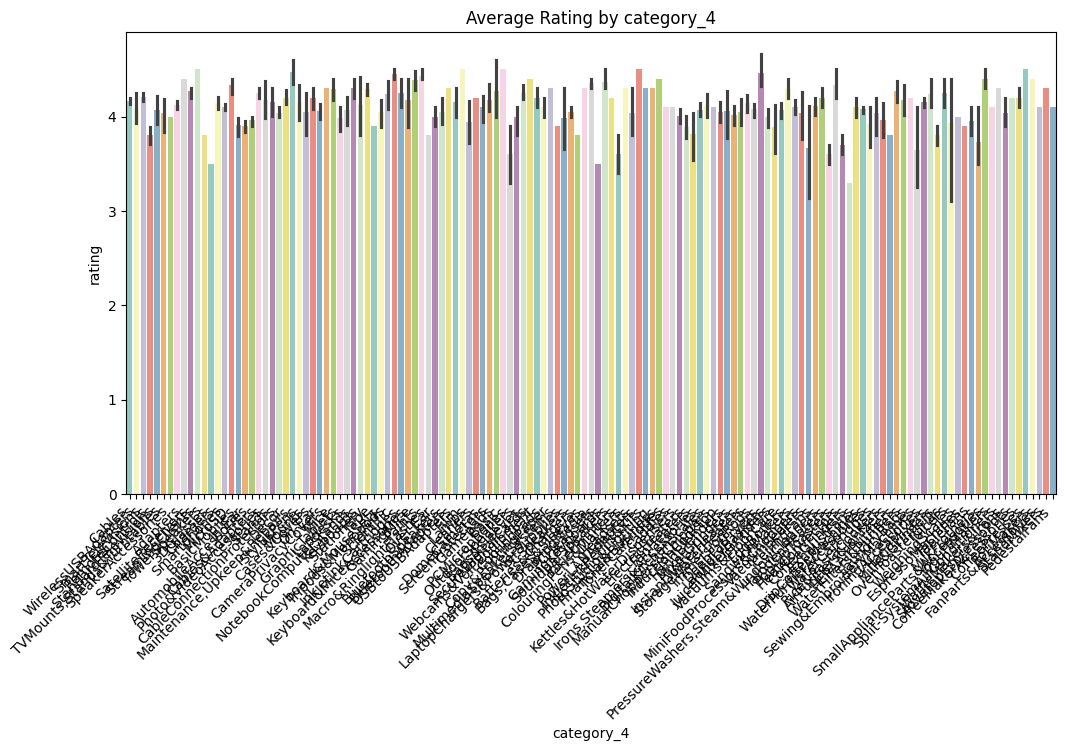

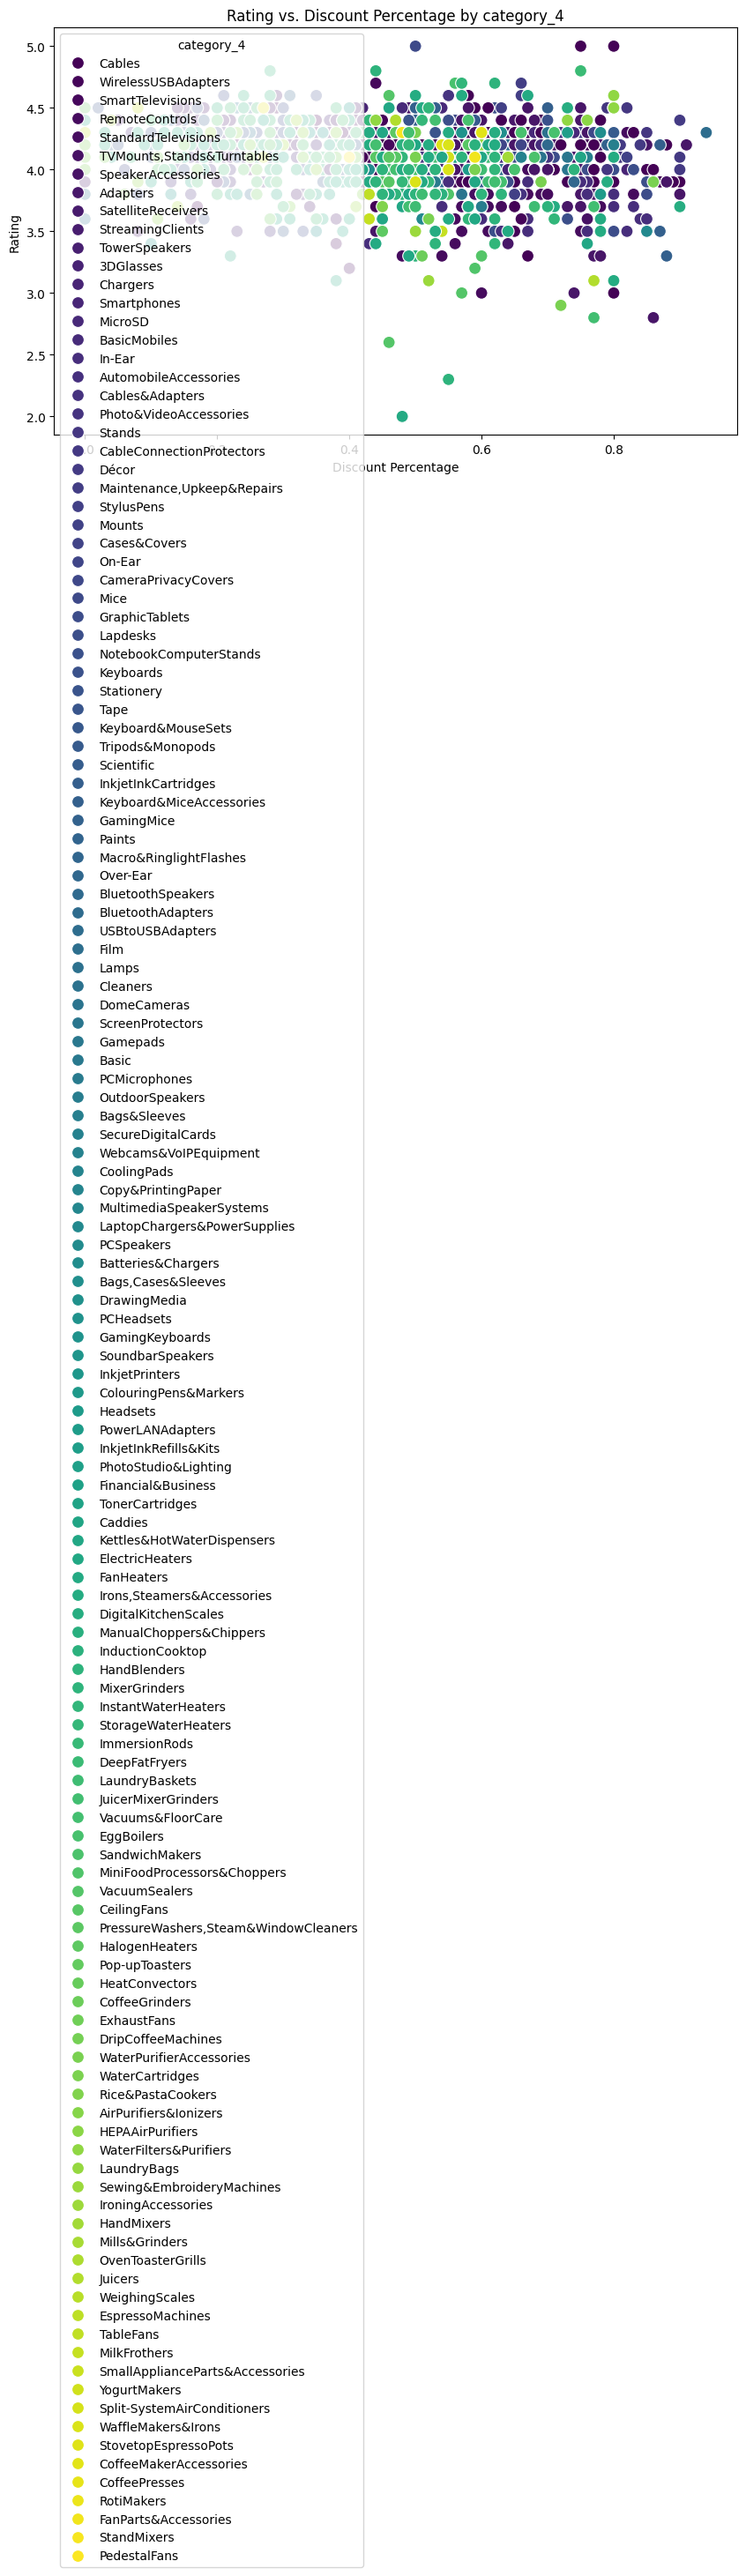

<ipython-input-14-ad26ee5bea23>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_column, y='rating', data=new_df_categories, palette="Set3")


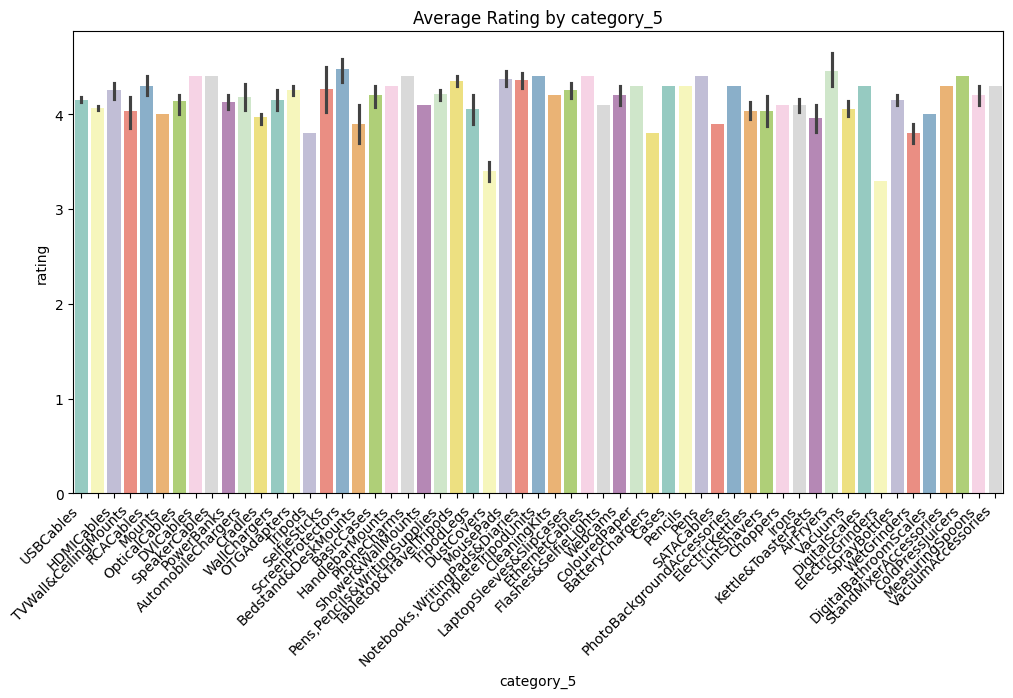

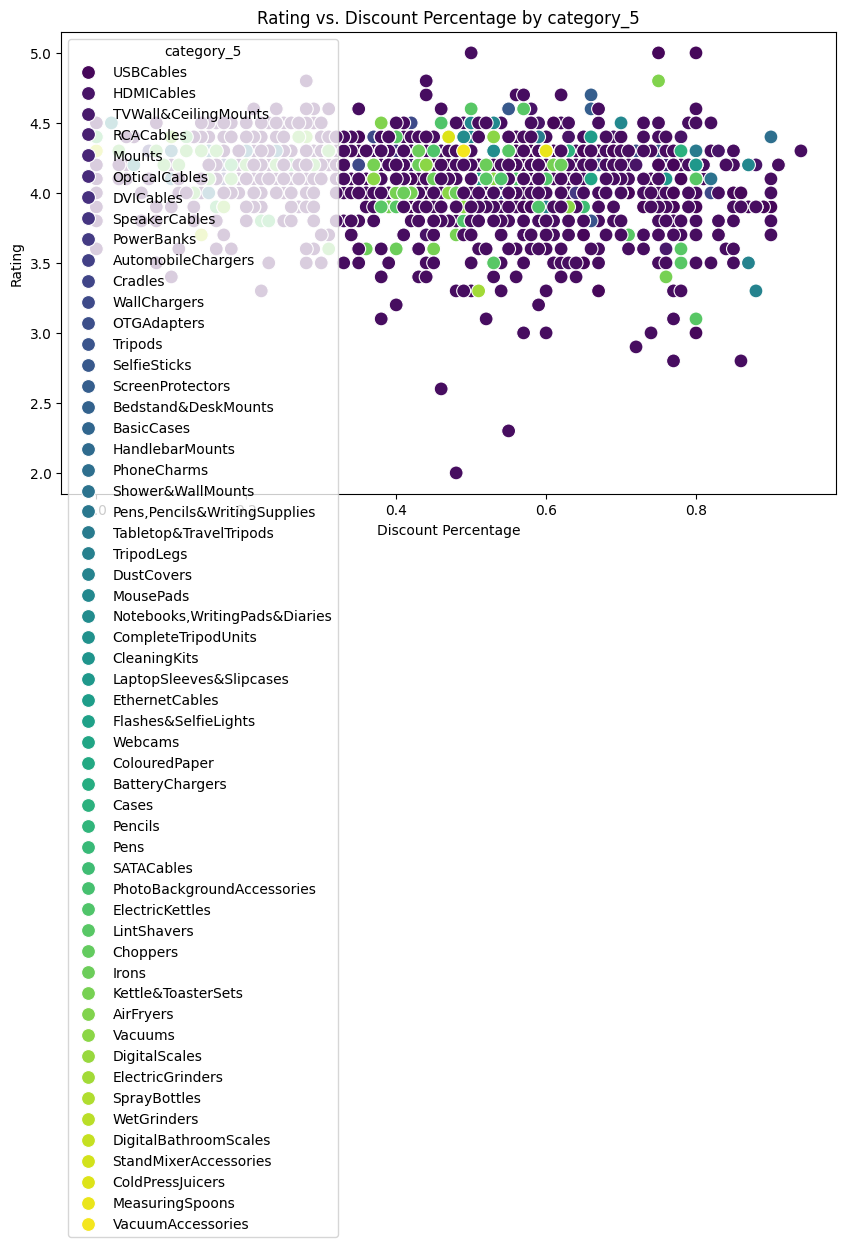

In [ ]:
# prompt: draw data visualization about category relationships only with rating using individual category columns that we have already done

# Assuming 'new_df_categories' is your DataFrame with split categories
# and aggregated data as shown in the previous code.

import matplotlib.pyplot as plt
import seaborn as sns

# Create visualizations for each category column
for i in range(1, 6):
    category_column = f'category_{i}'
    if category_column in new_df_categories.columns:
        # Bar plot for average rating by category
        plt.figure(figsize=(12, 6))
        sns.barplot(x=category_column, y='rating', data=new_df_categories, palette="Set3")
        plt.title(f'Average Rating by {category_column}')
        plt.xticks(rotation=45, ha='right')
        plt.show()

        # Scatter plot of rating vs. discount percentage
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='discount_percentage', y='rating', hue=category_column, data=new_df_categories, palette='viridis', s=100)
        plt.xlabel('Discount Percentage')
        plt.ylabel('Rating')
        plt.title(f'Rating vs. Discount Percentage by {category_column}')
        plt.show()
    else:
        print(f"Column {category_column} not found in the DataFrame.")

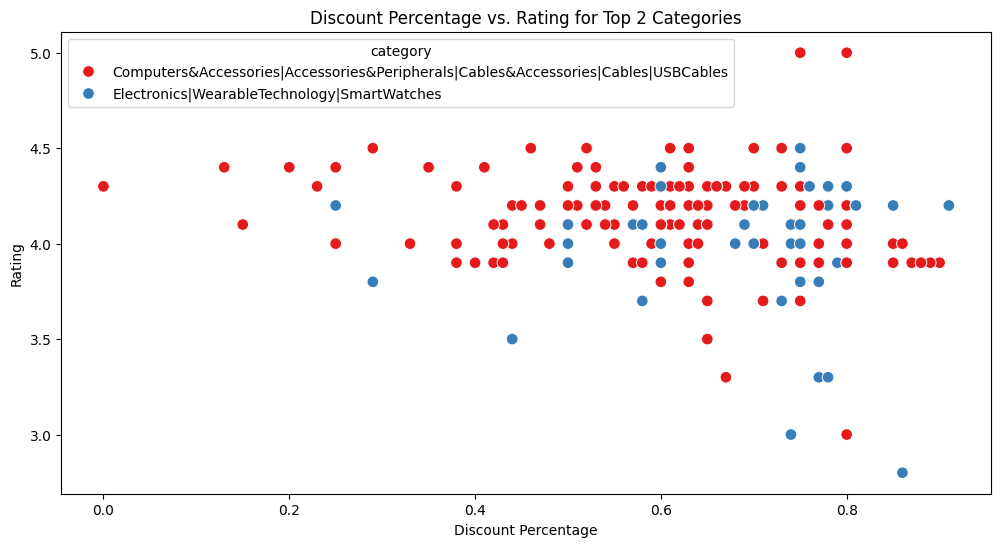

<ipython-input-15-ab777a9993af>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='discount_percentage', data=df_top_categories, palette='Set1')


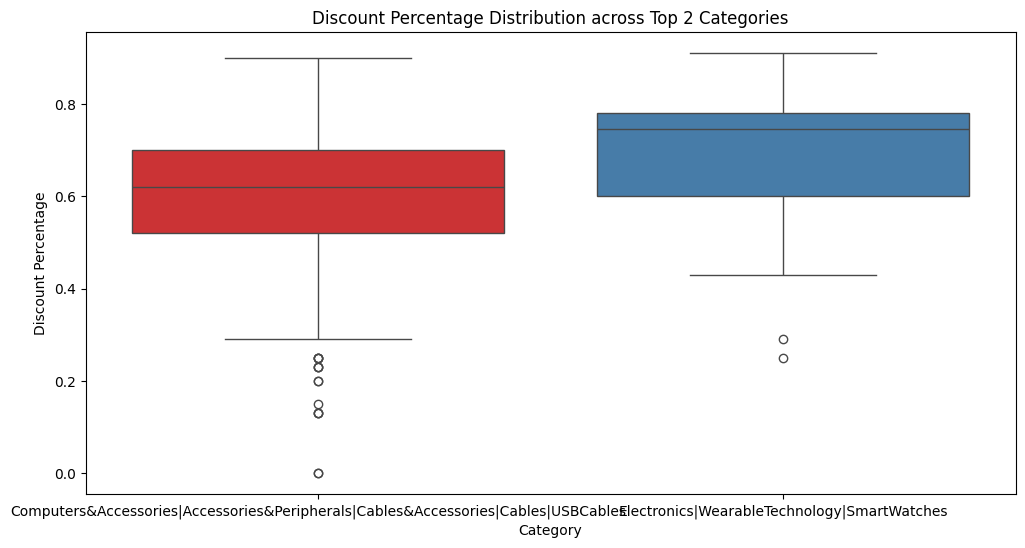

<ipython-input-15-ab777a9993af>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='discount_percentage', data=df_top_categories, palette='Set1')


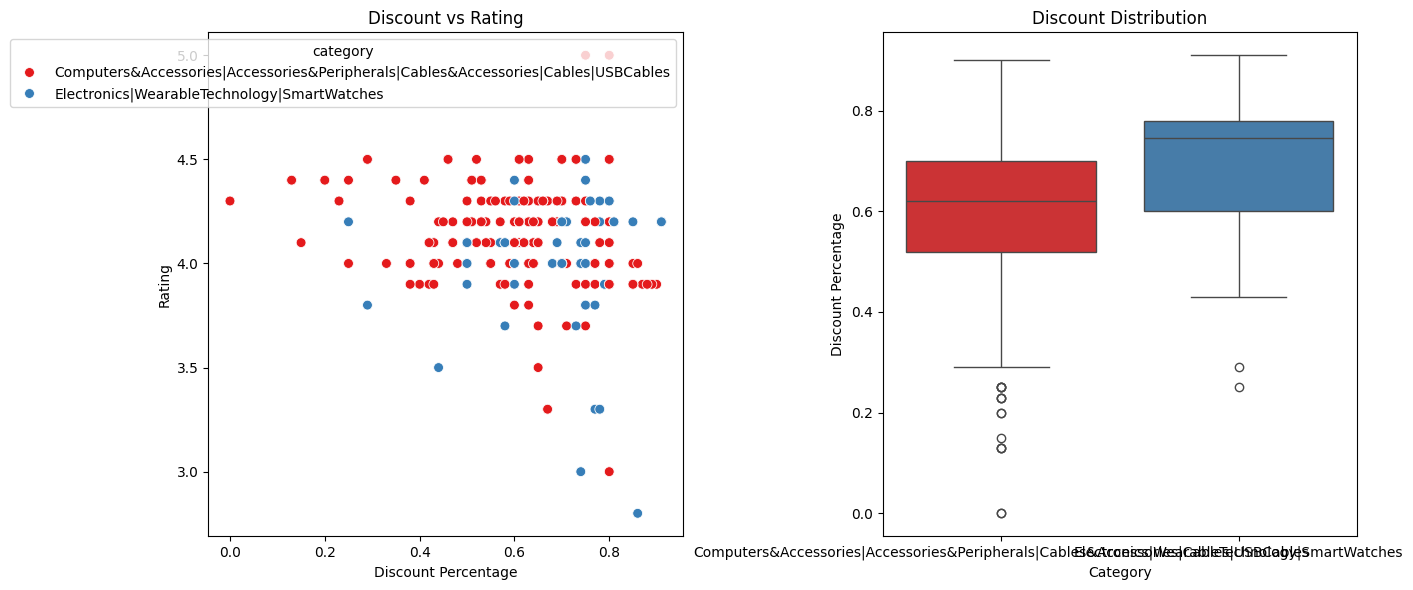

In [ ]:
# prompt: draw data visulaization about only first and second category's relationship with disount and rating for new dataset, try to find something

# Filter for the first two categories
top_categories = df_selected['category'].value_counts().nlargest(2).index
df_top_categories = df_selected[df_selected['category'].isin(top_categories)]

# Visualization of the top two categories' relationship with discount and rating
plt.figure(figsize=(12, 6))
sns.scatterplot(x='discount_percentage', y='rating', hue='category', data=df_top_categories, palette='Set1', s=70)
plt.title('Discount Percentage vs. Rating for Top 2 Categories')
plt.xlabel('Discount Percentage')
plt.ylabel('Rating')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='discount_percentage', data=df_top_categories, palette='Set1')
plt.title('Discount Percentage Distribution across Top 2 Categories')
plt.xlabel('Category')
plt.ylabel('Discount Percentage')
plt.show()

# Create a combined plot for better comparison
plt.figure(figsize=(14, 6))

# First subplot: Scatterplot
plt.subplot(1, 2, 1)
sns.scatterplot(x='discount_percentage', y='rating', hue='category', data=df_top_categories, palette='Set1', s=50)
plt.title('Discount vs Rating')
plt.xlabel('Discount Percentage')
plt.ylabel('Rating')

# Second subplot: Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x='category', y='discount_percentage', data=df_top_categories, palette='Set1')
plt.title('Discount Distribution')
plt.xlabel('Category')
plt.ylabel('Discount Percentage')


plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

<ipython-input-16-0cf97a0e6f6b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['user_id'] = user_ids


         discounted_price  actual_price    rating
user_id                                          
User1            43388.00       60718.0  4.120000
User10           59893.00      114365.0  4.081818
User100          29840.00       59476.0  4.258333
User11           43992.99       84236.0  4.205882
User12           92958.84      161194.0  4.000000


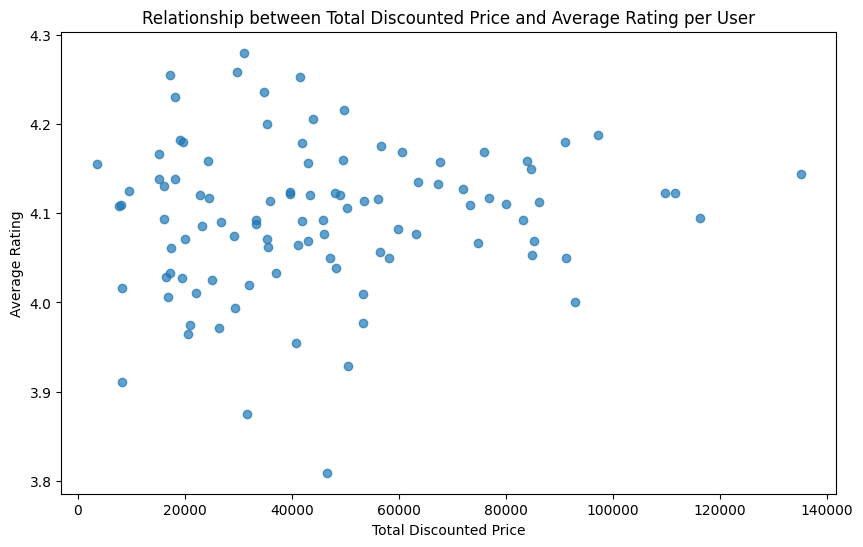

In [ ]:
# Assuming 'df_selected' is your DataFrame as defined in the previous code

# If 'user_id' is not present, create a sample column for demonstration
if 'user_id' not in df_selected.columns:
    # Example: Generating random user IDs (replace with your actual user ID column if available)
    import random
    num_rows = len(df_selected)
    user_ids = [f"User{random.randint(1, 100)}" for _ in range(num_rows)]
    df_selected['user_id'] = user_ids

# Group by user_id and calculate the sum of discounted and actual prices
user_summary = df_selected.groupby('user_id').agg({'discounted_price': 'sum', 'actual_price': 'sum', 'rating': 'mean'})

print(user_summary.head())

# Now you can explore the relationship between aggregated prices and rating
# Example: Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(user_summary['discounted_price'], user_summary['rating'], alpha=0.7)
plt.xlabel('Total Discounted Price')
plt.ylabel('Average Rating')
plt.title('Relationship between Total Discounted Price and Average Rating per User')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Prepare the data
X = user_summary[['discounted_price', 'actual_price']]  # Features
y = user_summary['rating']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # You can adjust n_estimators
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Example prediction for new data
new_data = pd.DataFrame({'discounted_price': [1500], 'actual_price': [2000]})
predicted_rating = rf_model.predict(new_data)
print(f"Predicted Rating for new data: {predicted_rating[0]}")

Mean Squared Error: 0.006747213375495896
Predicted Rating for new data: 4.156900000000005


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=10, scoring='neg_mean_squared_error', cv=5, random_state=42, n_jobs=-1, verbose=1)

# Perform the search
random_search.fit(X_train, y_train)

# Get the best model
best_rf_model = random_search.best_estimator_

# Evaluate the best model
y_pred_best = best_rf_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)

print(f"Best Hyperparameters: {random_search.best_params_}")
print(f"Mean Squared Error (Best Model): {mse_best}")

# Example prediction with the best model
predicted_rating_best = best_rf_model.predict(new_data)
print(f"Predicted Rating for new data (Best Model): {predicted_rating_best[0]}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}
Mean Squared Error (Best Model): 0.006898665098962772
Predicted Rating for new data (Best Model): 4.138250515873016


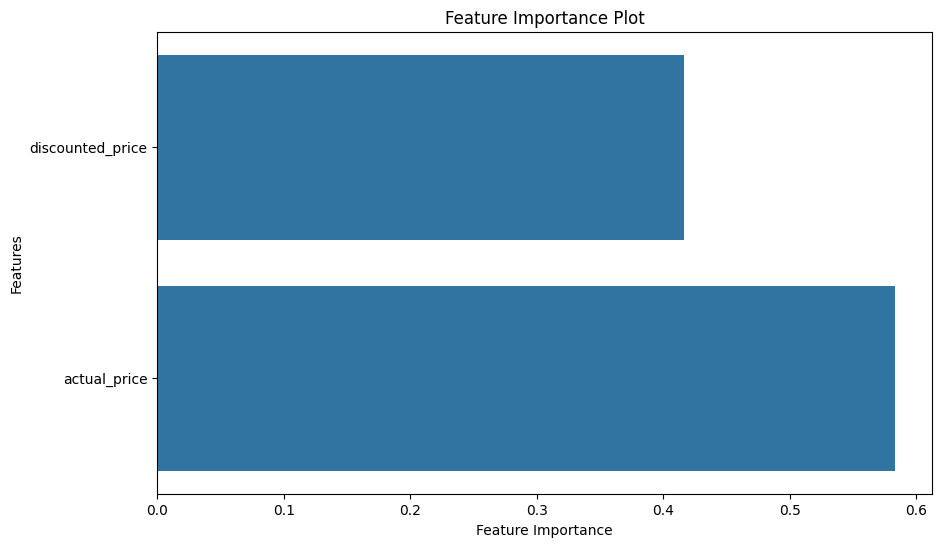

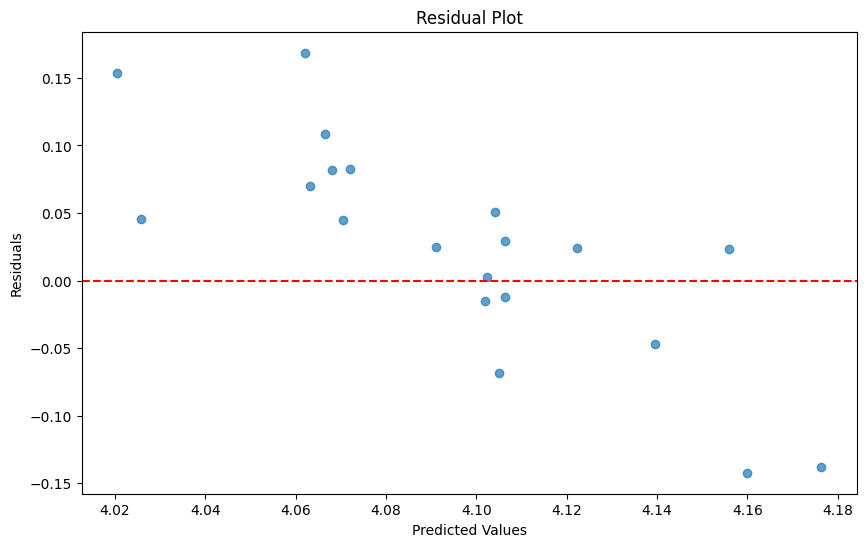

<ipython-input-31-a0a938a93852>:35: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


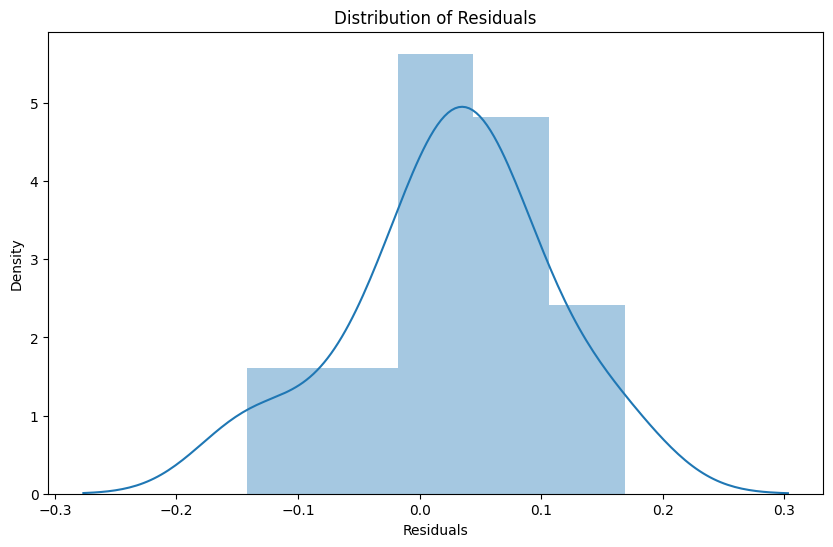

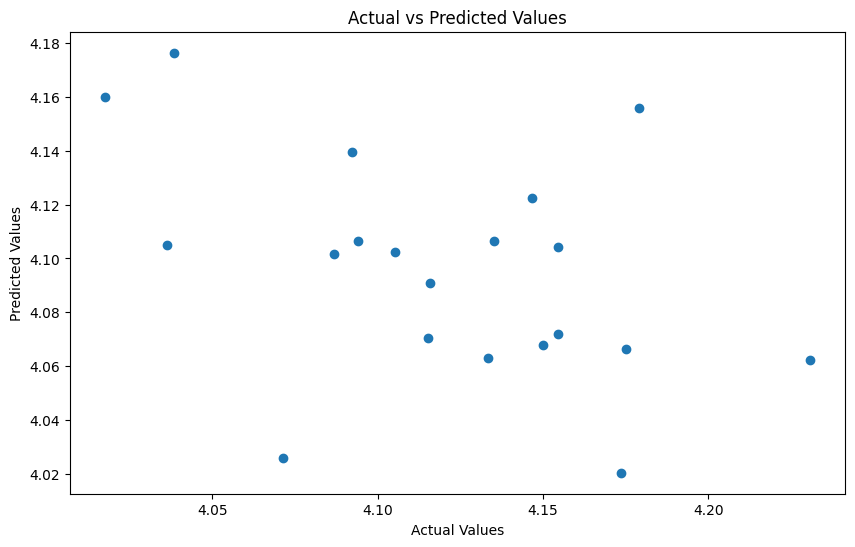

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'best_rf_model' and 'X_train' are defined from your previous code

# Feature Importance Plot
feature_importances = best_rf_model.feature_importances_
feature_names = X_train.columns  # Assuming X_train is your feature matrix

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Plot")
plt.show()


# Residual Plot
y_pred_best = best_rf_model.predict(X_test)
residuals = y_test - y_pred_best

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


# Prediction Error Plot
plt.figure(figsize=(10, 6))
sns.distplot(residuals)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

# Actual vs Predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

In [ ]:
# prompt: please do some transformation with Cook's distance for the influential points and then apply it to the best random forest model

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence

# Assuming 'X_train', 'y_train', 'best_rf_model' are defined from the previous code

# Prepare the data for statsmodels (add a constant term)
X_train_sm = sm.add_constant(X_train)

# Fit an OLS model (for Cook's distance calculation)
ols_model = sm.OLS(y_train, X_train_sm).fit()

# Calculate Cook's distance
influence = OLSInfluence(ols_model)
cooks_distance = influence.cooks_distance[0]

# Set a threshold for influential points (e.g., 4/n)
threshold = 4 / len(X_train)
influential_points_indices = np.where(cooks_distance > threshold)[0]

# Remove influential points from training data
X_train_cleaned = X_train.drop(X_train.index[influential_points_indices])
y_train_cleaned = y_train.drop(y_train.index[influential_points_indices])


# Retrain the best Random Forest model with the cleaned data
best_rf_model.fit(X_train_cleaned, y_train_cleaned)

# Evaluate the model with cleaned data (optional)
y_pred_cleaned = best_rf_model.predict(X_test)
mse_cleaned = mean_squared_error(y_test, y_pred_cleaned)
print(f"Mean Squared Error (Best Model with Cleaned Data): {mse_cleaned}")

# Now best_rf_model is trained without influential points

Mean Squared Error (Best Model with Cleaned Data): 0.005522883413148877


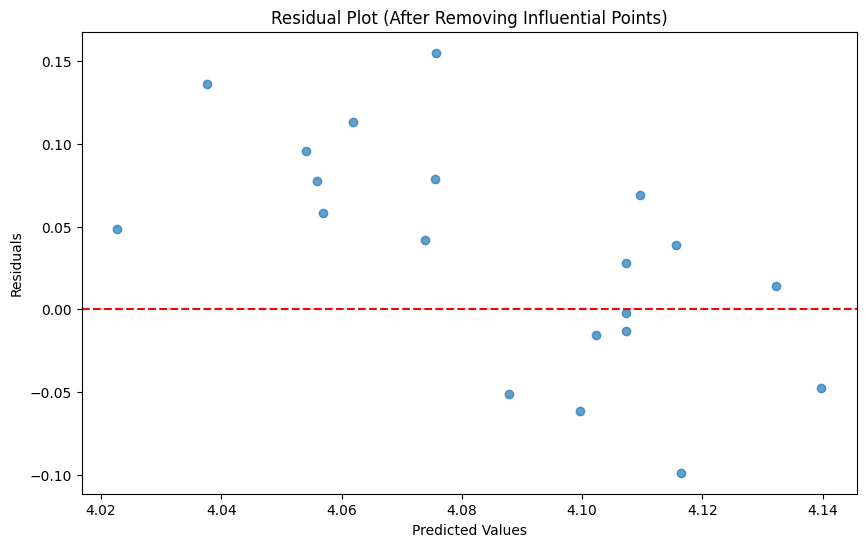

In [ ]:
# draw the residual plot again
# Residual Plot after removing influential points
y_pred_cleaned = best_rf_model.predict(X_test)
residuals_cleaned = y_test - y_pred_cleaned

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_cleaned, residuals_cleaned, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (After Removing Influential Points)")
plt.show()

In [ ]:
# prompt: I want to relate discount to rating, but the ratings are "grouped" into users (multiple ratings for each user) so include the user as what is called a "random effect."

import statsmodels.formula.api as smf

# Assuming 'df_selected' is your DataFrame with 'user_id', 'discount_percentage', and 'rating' columns.

# Create a mixed-effects model
model = smf.mixedlm("rating ~ discount_percentage", df_selected, groups=df_selected["user_id"])
result = model.fit()

# Print the model summary
print(result.summary())

# Access specific results (e.g., fixed effects coefficients)
result.params

IndexError: index 1464 is out of bounds for axis 0 with size 1464

In [ ]:
import re
import lightgbm as lgb
# Ensure all columns are numeric or categorical
# Convert 'object' type columns to strings for processing
df_selected = df_selected.apply(lambda x: x.astype(str) if x.dtypes == 'object' else x)

# Drop or encode non-numeric columns
columns_to_drop = ['product_id', 'user_id']  # Drop irrelevant columns
df_selected = df_selected.drop(columns=columns_to_drop, errors='ignore')

# Define features (X) and target (y)
X = df_selected.drop('rating', axis=1)  # Exclude 'rating' as the target variable
y = df_selected['rating']

# One-hot encode categorical features
X = pd.get_dummies(X, columns=['category'], drop_first=True)

# Rename columns, replacing non-alphanumeric characters with underscores
X = X.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '', x))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to LightGBM dataset format
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Define LightGBM parameters
params = {
    'objective': 'regression',  # Use regression for rating prediction
    'metric': 'rmse',  # Root Mean Squared Error
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Train the LightGBM model
gbm = lgb.train(params,
                train_data,
                num_boost_round=100,
                valid_sets=test_data,
                callbacks=[lgb.early_stopping(stopping_rounds=10)])

# Make predictions on the test set
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Example: Predict the rating for a new product
new_product = pd.DataFrame({
    'discounted_price': [1000],
    'actual_price': [3000],
    'discount_percentage': [0.66],
    'rating_count': [100],
    'category': ['gg']  # Replace with actual category
})

# One-hot encode the new product's category
new_product = pd.get_dummies(new_product, columns=['category'])

# Align columns with the training data
missing_cols = set(X_train.columns) - set(new_product.columns)
for col in missing_cols:
    new_product[col] = 0
new_product = new_product[X_train.columns]

# Predict the rating for the new product
predicted_rating = gbm.predict(new_product, num_iteration=gbm.best_iteration)
print(f"Predicted rating for the new product: {predicted_rating[0]}")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.066366 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 691
[LightGBM] [Info] Number of data points in the train set: 1172, number of used features: 14
[LightGBM] [Info] Start training from score 4.097184
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[51]	valid_0's rmse: 0.260972
RMSE: 0.2609721201776586
Predicted rating for the new product: 3.994429238341561


<ipython-input-20-7c1c3d7c438c>:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_product[col] = 0
<ipython-input-20-7c1c3d7c438c>:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_product[col] = 0
<ipython-input-20-7c1c3d7c438c>:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_product[c

# NLP Part

In [ ]:
pip install scikit-learn wordcloud pandas numpy matplotlib


In [ ]:
from sklearn.decomposition import PCA
from wordcloud import WordCloud
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


# Load the dataset
data = pd.read_csv("amazon.csv")
data = data.dropna(subset=['review_content', 'rating'])

# Remove non-numeric values from the 'rating' column
data = data[data['rating'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]  # Check if values are numeric
data['rating'] = data['rating'].astype(float)  # Convert to float

tfidf = TfidfVectorizer(max_features=500, stop_words='english')  # Use TF-IDF
X_reviews = tfidf.fit_transform(data['review_content']).toarray()


# Apply KMeans clustering
num_clusters = 11
kmeans = KMeans(n_clusters=num_clusters, random_state=1)
review_clusters = kmeans.fit_predict(X_reviews)

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_reviews)

# Define grid for decision boundary
h = 0.01  # Mesh size
x_min, x_max = reduced_data[:, 0].min() - 0.1, reduced_data[:, 0].max() + 0.1
y_min, y_max = reduced_data[:, 1].min() - 0.1, reduced_data[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict clusters for each grid point
Z = kmeans.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Plot existing cluster scatter points
plt.figure(figsize=(12, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=review_clusters, s=50, cmap=plt.cm.Paired, edgecolors='k')
plt.title("Clusters with Decision Boundaries")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Overlay decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.show()
"""
# Generate Word Clouds for Each Cluster
for cluster_id in range(num_clusters):
    cluster_indices = np.where(review_clusters == cluster_id)[0]
    cluster_tfidf = X_reviews[cluster_indices].sum(axis=0)
    word_importances = {word: cluster_tfidf[i] for i, word in enumerate(tfidf.get_feature_names_out())}

    # Create word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_importances)

    # Plot word cloud
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for Cluster {cluster_id}")
    plt.show()

# Evaluate different numbers of clusters
wcss = []  # Within-cluster sum of squares (WCSS)
silhouette_scores = []  # Silhouette scores
cluster_range = range(2, 20)  # Testing clusters from 2 to 10


for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_reviews)

    # Calculate WCSS
    wcss.append(kmeans.inertia_)

    # Calculate silhouette score
    silhouette_scores.append(silhouette_score(X_reviews, cluster_labels))

# Plot WCSS (Elbow Method)
plt.figure(figsize=(12, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='--', color='b')
plt.title("Elbow Method: Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.xticks(cluster_range)
plt.grid()
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(12, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--', color='r')
plt.title("Silhouette Analysis: Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.xticks(cluster_range)
plt.grid()
plt.show()
"""


import seaborn as sns
import matplotlib.pyplot as plt

# Get the words for the TF-IDF matrix
words = tfidf.get_feature_names_out()

# For each cluster, get the top word based on the highest TF-IDF score
top_words = {}
for i in range(num_clusters):
    # Get the index of the word with the highest TF-IDF score for each cluster
    cluster_centroid = kmeans.cluster_centers_[i]
    sorted_index = np.argmax(cluster_centroid)  # Index of the word with the highest score
    top_word = words[sorted_index]  # Top word
    frequency = cluster_centroid[sorted_index]  # Frequency (TF-IDF score)
    top_words[i] = (top_word, frequency)

# Create a DataFrame for plotting (with only the top word and its frequency)
top_words_df = pd.DataFrame([(cluster, word, freq) for cluster, (word, freq) in top_words.items()],
                            columns=['Cluster', 'Word', 'Frequency'])

# Create barplot of the top word for each cluster, removing error bars
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Word', y='Frequency', data=top_words_df, palette="Set2", ci=None, edgecolor='none')

# Display word frequencies on top of the bars without the line
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                xytext=(0, 5),  # Offset the text above the bar
                textcoords='offset points',
                ha='center', va='bottom',
                fontsize=10, color='black')

plt.title("Top Word for Each Cluster with Frequency")
plt.xlabel("Clusters")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer



df = pd.read_csv('amazon.csv')

# 清理数据，去除空值
df = df.dropna(subset=['about_product', 'review_content'])


# 定义一个函数绘制词频图和直方图
def plot_word_frequency(text_data, title):
    # 使用 CountVectorizer 提取词频
    vectorizer = CountVectorizer(stop_words='english', max_features=100)  # 设置停用词和最大特征数
    word_count = vectorizer.fit_transform(text_data)

    # 获取词汇和对应的词频
    word_freq = word_count.sum(axis=0).A1  # 获取词频数组
    words = vectorizer.get_feature_names_out()  # 获取特征词汇

    # 创建数据框以方便排序和绘图
    word_freq_df = pd.DataFrame({'Word': words, 'Frequency': word_freq})
    word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False).head(20)  # 取前20个词汇

    # 绘制词频条形图
    plt.figure(figsize=(10, 5))
    plt.barh(word_freq_df['Word'], word_freq_df['Frequency'], color='skyblue')
    plt.xlabel('Frequency')
    plt.title(title)
    plt.gca().invert_yaxis()  # 反转y轴，使频率高的词在上面
    plt.show()


# 绘制关于产品的词频图
plot_word_frequency(df['about_product'], "Top 20 Words in About Product")

# 绘制评论内容的词频图
plot_word_frequency(df['review_content'], "Top 20 Words in Review Content")

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

# Load the dataset
data = pd.read_csv("amazon.csv")
data = data.dropna(subset=['review_content', 'rating'])

# Remove non-numeric values from the 'rating' column
data = data[data['rating'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]  # Check if values are numeric
data['rating'] = data['rating'].astype(float)  # Convert to float

# Text preprocessing using TF-IDF
tfidf = TfidfVectorizer(
    max_features=500,              # Extract the top 500 most important word features
    stop_words='english'           # Use the built-in English stop words list
)
X_reviews = tfidf.fit_transform(data['review_content']).toarray()
y = data['rating']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reviews, y, test_size=0.2, random_state=42)

# Build a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"RMSE: {rmse}")

# Feature importance
feature_importances = rf.feature_importances_
important_words = {word: importance for word, importance in zip(tfidf.get_feature_names_out(), feature_importances)}
sorted_words = sorted(important_words.items(), key=lambda x: x[1], reverse=True)
print("Top 10 important words:", sorted_words[:10])


import matplotlib.pyplot as plt
import seaborn as sns

# 1. Actual vs Predicted Ratings (Scatter Plot)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([3.5, 4.5], [3.5, 4.5], color='red', linestyle='--')  # Diagonal line where predictions = actual
plt.title("Actual vs Predicted Ratings")
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.show()

# 2. Feature Importance Visualization with Values Annotated (Bar Plot)
top_n = 10  # Number of top features to show
top_words = sorted_words[:top_n]
words, importances = zip(*top_words)

plt.figure(figsize=(10, 6))
bars = plt.barh(words, importances, color='skyblue')
plt.title(f"Top {top_n} Important Features (Words)")
plt.xlabel("Importance")
plt.ylabel("Words")
plt.gca().invert_yaxis()  # Invert y-axis to show the most important word at the top

# Annotate the bars with their importance values
for bar in bars:
    width = bar.get_width()
    plt.text(width / 2, bar.get_y() + bar.get_height() / 2,
             f'{width:.3f}', va='center', ha='center', color='white')

plt.show()

# 3. Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.residplot(y_pred, residuals, lowess=True, color="g", line_kws={'color': 'red', 'lw': 1})
plt.title("Residual Plot")
plt.xlabel("Predicted Ratings")
plt.ylabel("Residuals (Actual - Predicted)")
plt.show()


In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


df = pd.read_csv('amazon.csv')

about_text = " ".join(str(review) for review in df['about_product'].dropna())
review_text = " ".join(str(review) for review in df['review_content'].dropna())

# 生成词云图函数
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=2560, height=1440, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# 绘制词云图
generate_wordcloud(about_text, "Word Cloud of About Product")
generate_wordcloud(review_text, "Word Cloud of Review Content")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error

# Load the dataset
data = pd.read_csv("amazon.csv")
data = data.dropna(subset=['about_product', 'rating'])

# Remove non-numeric values from the 'rating' column
data = data[data['rating'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]  # Check if values are numeric
data['rating'] = data['rating'].astype(float)  # Convert to float

# Text preprocessing using TF-IDF
tfidf = TfidfVectorizer(
    max_features=500,              # Extract the top 500 most important word features
    stop_words='english'           # Use the built-in English stop words list
)
X_reviews = tfidf.fit_transform(data['about_product']).toarray()
y = data['rating']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reviews, y, test_size=0.2, random_state=42)

# Build a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model using Root Mean Squared Error
y_pred = rf.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"RMSE: {rmse}")

# Feature importance
feature_importances = rf.feature_importances_
important_words = {word: importance for word, importance in zip(tfidf.get_feature_names_out(), feature_importances)}
sorted_words = sorted(important_words.items(), key=lambda x: x[1], reverse=True)
print("Top 10 important words:", sorted_words[:10])


import matplotlib.pyplot as plt
import seaborn as sns

# 1. Actual vs Predicted Ratings (Scatter Plot)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([3, 5], [3, 5], color='red', linestyle='--')  # Diagonal line where predictions = actual
plt.title("Actual vs Predicted Ratings")
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.show()

# 2. Feature Importance Visualization with Values Annotated (Bar Plot)
top_n = 10  # Number of top features to show
top_words = sorted_words[:top_n]
words, importances = zip(*top_words)

plt.figure(figsize=(10, 6))
bars = plt.barh(words, importances, color='skyblue')
plt.title(f"Top {top_n} Important Features (Words)")
plt.xlabel("Importance")
plt.ylabel("Words")
plt.gca().invert_yaxis()  # Invert y-axis to show the most important word at the top

# Annotate inside the bars with importance values
for bar in bars:
    width = bar.get_width()
    plt.text(width / 2, bar.get_y() + bar.get_height() / 2,
             f'{width:.3f}', va='center', ha='center', color='white')

plt.show()

# 3. Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.residplot(y_pred, residuals, lowess=True, color="g", line_kws={'color': 'red', 'lw': 1})
plt.title("Residual Plot")
plt.xlabel("Predicted Ratings")
plt.ylabel("Residuals (Actual - Predicted)")
plt.show()


In [ ]:
from sklearn.decomposition import PCA
from wordcloud import WordCloud
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt




# Load the dataset
data = pd.read_csv("amazon.csv")
data = data.dropna(subset=['about_product', 'rating'])

# Remove non-numeric values from the 'rating' column
data = data[data['rating'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]  # Check if values are numeric
data['rating'] = data['rating'].astype(float)  # Convert to float

# Load data and preprocess
tfidf = TfidfVectorizer(max_features=500, stop_words='english')
X_reviews = tfidf.fit_transform(data['about_product']).toarray()

# Apply KMeans clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=1)
review_clusters = kmeans.fit_predict(X_reviews)

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_reviews)

# Define grid for decision boundary
h = 0.01  # Mesh size
x_min, x_max = reduced_data[:, 0].min() - 0.1, reduced_data[:, 0].max() + 0.1
y_min, y_max = reduced_data[:, 1].min() - 0.1, reduced_data[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict clusters for each grid point
Z = kmeans.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Plot existing cluster scatter points
plt.figure(figsize=(12, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=review_clusters, s=50, cmap=plt.cm.Paired, edgecolors='k')
plt.title("Clusters with Decision Boundaries")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Overlay decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.show()

# Generate Word Clouds for Each Cluster
for cluster_id in range(num_clusters):
    cluster_indices = np.where(review_clusters == cluster_id)[0]
    cluster_tfidf = X_reviews[cluster_indices].sum(axis=0)
    word_importances = {word: cluster_tfidf[i] for i, word in enumerate(tfidf.get_feature_names_out())}

    # Create word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_importances)

    # Plot word cloud
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for Cluster {cluster_id}")
    plt.show()

# Evaluate different numbers of clusters
wcss = []  # Within-cluster sum of squares (WCSS)
silhouette_scores = []  # Silhouette scores
cluster_range = range(2, 20)  # Testing clusters from 2 to 10

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_reviews)

    # Calculate WCSS
    wcss.append(kmeans.inertia_)

    # Calculate silhouette score
    silhouette_scores.append(silhouette_score(X_reviews, cluster_labels))

# Plot WCSS (Elbow Method)
plt.figure(figsize=(12, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='--', color='b')
plt.title("Elbow Method: Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.xticks(cluster_range)
plt.grid()
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(12, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--', color='r')
plt.title("Silhouette Analysis: Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.xticks(cluster_range)
plt.grid()
plt.show()